# Table of Contents

1. [Importing Data & Libraries](#1.-Importing-Data-&-Libraries)<br>
    1.1 [Libraries](#1.1-Libraries) <br>
    1.2 [Data](#1.2-Importing-Data) <br> 
2. [Lexicon Based Sentiment Analysis](#2.-Lexicon-Based-Sentiment-Analysis) <br>
    2.1 [Vader](#2.1-Vader)<br>
        2.1.1 [Visualisations](#2.1.1-Visualisations)<br>
    2.2 [TextBlob](#2.2-TextBlob-Sentiment-Analyzer)<br>
        2.2.1 [Visualisations](#2.2.1-Visualisations)<br> 
    2.3 [AFINN](#2.3-AFINN)<br>
        2.3.1 [Visualisations](#2.3.1-Visualisations)<br>
        2.3.2 [Normalised AFINN](#2.3.2-Normalised-AFINN)<br>  
3. [Model Comparison](#3.-Model-Comparison)<br>
4. [Further Exploration](#4.-Further-Exploration)

In this notebook we will continue to explore our data by using Lexicon-Based Sentiment Analysers.

** **

## 1. Importing Data & Libraries

### 1.1 Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# AFINN
from afinn import Afinn

# Scaler
from sklearn.preprocessing import MinMaxScaler

# External files
import preprocessing
import lexicon_based



pd.set_option('display.max_columns', None)

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


**Veryfying if the functions of the external py files were imported**

In [2]:
functions = [func for func in dir(lexicon_based) if callable(getattr(lexicon_based, func))]

# Print the list of functions
print("Functions in the external module:")
for func in functions:
    print(func)

Functions in the external module:
SentimentIntensityAnalyzer
TextBlob
plot_sentiment_histograms
textblob_sa
textblob_subjectivity
vader_algorithm


### 1.2 Data

In [3]:
dataset = pd.read_csv('/Users/antoniooliveira/MannheimWMProject/processed_data_v2.csv')

In [4]:
dataset.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiment,Year,review_length,Reviews_1
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,2,2024,467,Flight amazing. The crew onboard flight welcom...
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,0,2024,249,Booking emergency exit seat still meant huge d...
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,2,2024,196,Excellent performance fronts. I would definite...
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,2,2024,991,Pretty comfortable flight considering I flying...
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,2,2024,310,The service consistently good start finish. Th...


## 2. Lexicon Based Sentiment Analysis

**Sorting the observations by sentiment, and saving them in sorted_sentiment**

In [5]:
sorted_sentiment = sorted(dataset['Sentiment'].unique())

### 2.1 Vader

**Applying Vader on the preprocessed column** *Reviews_1*

In [6]:
dataset["vader_polarity_compound"] = dataset["Reviews_1"].apply(lambda review : lexicon_based.vader_algorithm(str(review)))

dataset["vader_polarity_scores"] = dataset["Reviews_1"].apply(lambda review : lexicon_based.vader_algorithm(str(review), compound = False))

Grouping observations by their polarity

In [7]:
dataset.groupby('Sentiment')['vader_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
0,3022.0,-0.252487,0.671934,-0.9928,-0.847675,-0.52785,0.4019,0.9953
1,1672.0,0.399248,0.646049,-0.9931,-0.120525,0.73305,0.9300,0.9964
2,3405.0,0.875072,0.256647,-0.9308,0.900100,0.95690,0.9779,0.9993


#### 2.1.1 Visualisations

**Polarity Histogram per Sentiment**

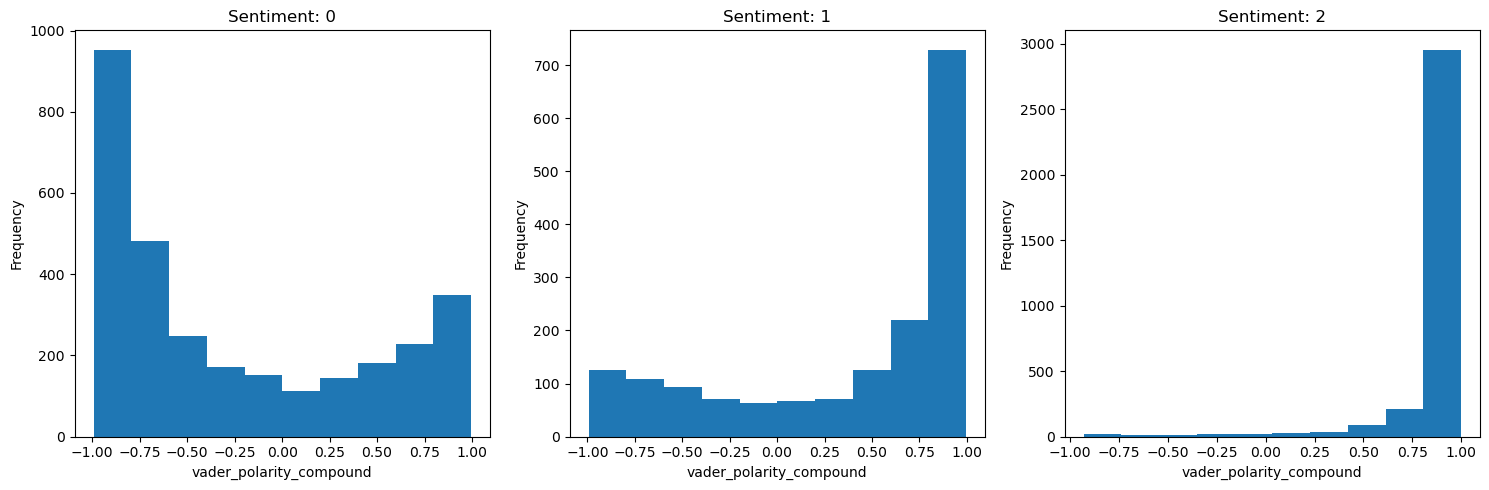

In [8]:
lexicon_based.plot_sentiment_histograms(dataset, sorted_sentiment, 'vader_polarity_compound')

**Polarity boxplots per Sentiment**

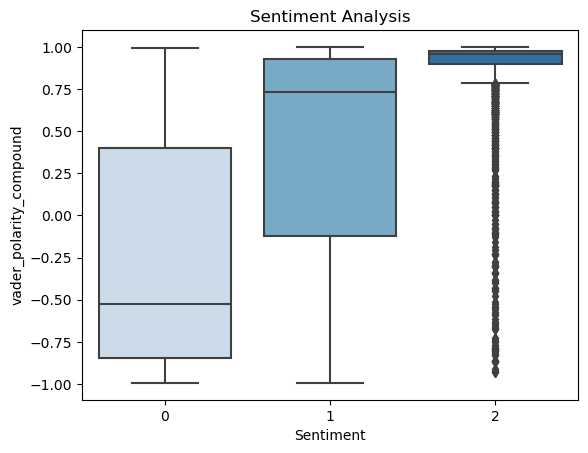

In [9]:
combined_data = pd.concat([dataset[dataset['Sentiment'] == sentiment] for sentiment in sorted_sentiment])

sns.boxplot(data=combined_data, x='Sentiment', y='vader_polarity_compound', palette ='Blues')
plt.title('Sentiment Analysis')
plt.show()

**Total Count histogram**

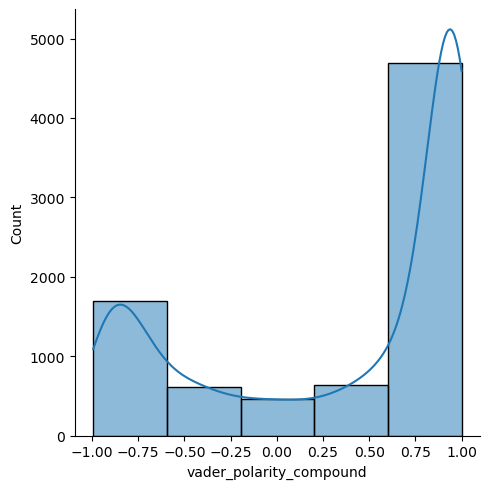

In [10]:
sns.displot(dataset["vader_polarity_compound"], kde=True, bins=5)
plt.show()

### 2.2 TextBlob Sentiment Analyzer

**Applying TextBlob to compute the polarity and subjectivity** *Reviews_1*

In [11]:
dataset["textblob_polarity_compound"] = dataset["Reviews_1"].apply(lambda review : lexicon_based.textblob_sa(str(review)))

In [12]:
dataset["textblob_subjectivity"] = dataset["Reviews_1"].apply(lexicon_based.textblob_subjectivity)

Grouping observations by their polarity

In [13]:
dataset.groupby('Sentiment')['textblob_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
0,3022.0,-0.024396,0.181879,-1.000000,-0.116667,-0.009902,0.078085,1.0
1,1672.0,0.112089,0.170221,-1.000000,0.014012,0.114794,0.212289,0.8
2,3405.0,0.321930,0.163338,-0.666667,0.219331,0.315278,0.417500,1.0


#### 2.2.1 Visualisations

**Polarity Histogram per Sentiment**

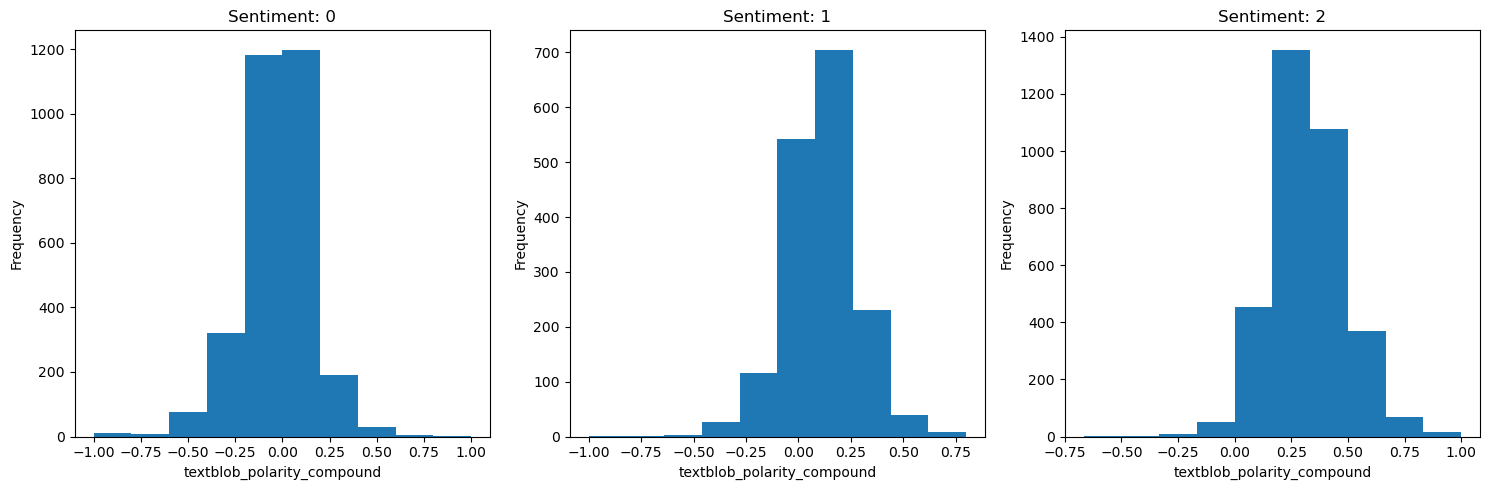

In [14]:
lexicon_based.plot_sentiment_histograms(dataset, sorted_sentiment, 'textblob_polarity_compound')

**Polarity boxplots per Sentiment**

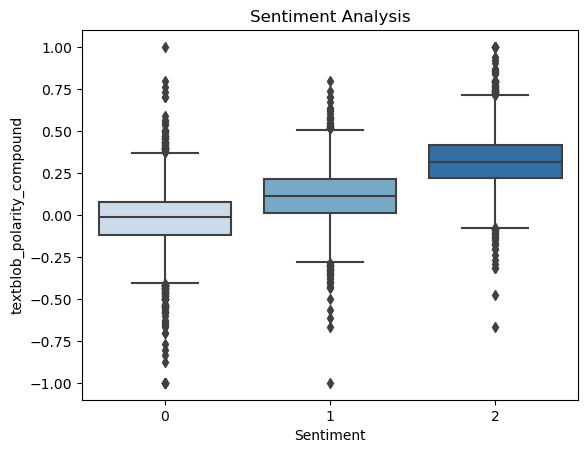

In [15]:
combined_data = pd.concat([dataset[dataset['Sentiment'] == sentiment] for sentiment in sorted_sentiment])

sns.boxplot(data=combined_data, x='Sentiment', y='textblob_polarity_compound',  palette ='Blues')
plt.title('Sentiment Analysis')
plt.show()

**Total Count histogram**

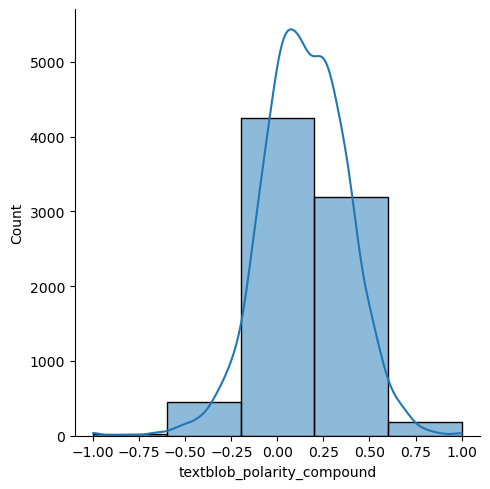

In [16]:
sns.displot(dataset["textblob_polarity_compound"], kde=True, bins=5)
plt.show()

### 2.3 AFINN

**Applying AFINN on the preprocessed column** *Reviews_1*

In [17]:
afinn = Afinn()

dataset['Afinn_polarity_compound'] = dataset['Reviews_1'].apply(lambda x: 
                                              afinn.score(x))

Grouping observations by their polarity

In [18]:
dataset.groupby('Sentiment')['Afinn_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
0,3022.0,-4.011582,7.902011,-46.0,-8.0,-4.0,0.0,51.0
1,1672.0,4.867823,9.389624,-36.0,-1.0,4.0,10.0,45.0
2,3405.0,14.209985,9.557496,-16.0,8.0,13.0,19.0,108.0


#### 2.3.1 Visualisations

**Polarity Histogram per Sentiment**

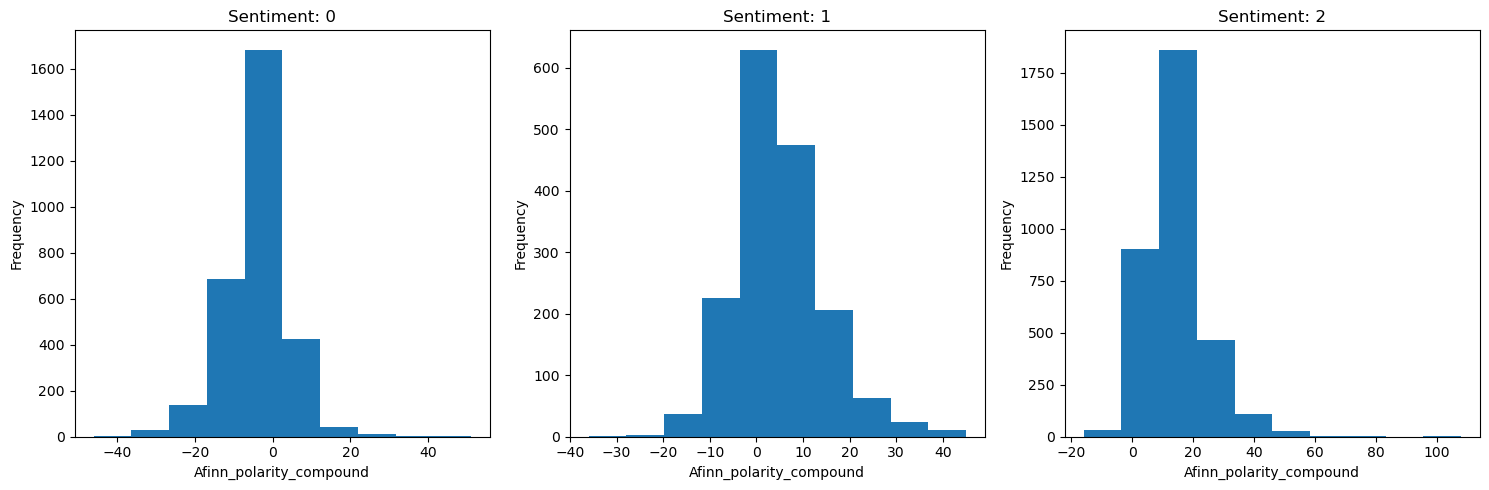

In [19]:
lexicon_based.plot_sentiment_histograms(dataset, sorted_sentiment, 'Afinn_polarity_compound')

**Polarity boxplots per Sentiment**

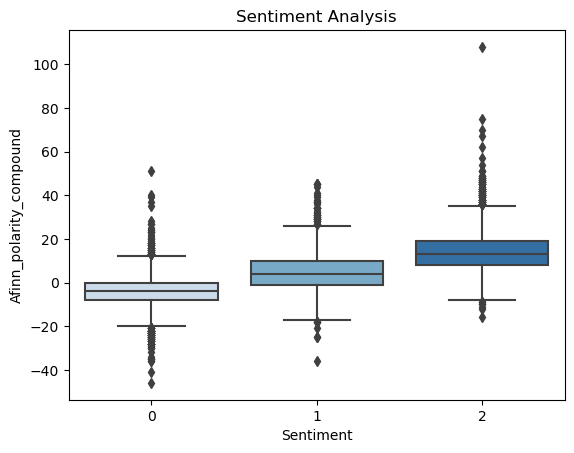

In [20]:
combined_data = pd.concat([dataset[dataset['Sentiment'] == sentiment] for sentiment in sorted_sentiment])

sns.boxplot(data=combined_data, x='Sentiment', y='Afinn_polarity_compound',  palette ='Blues')
plt.title('Sentiment Analysis')
plt.show()

**Total Count histogram**

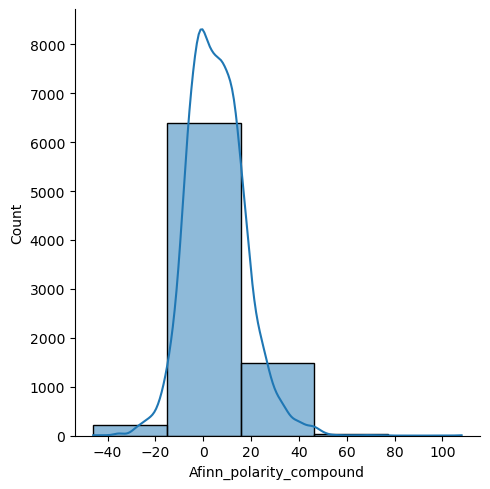

In [21]:
sns.displot(dataset["Afinn_polarity_compound"], kde=True, bins=5)
plt.show()

#### 2.3.2 Normalised AFINN

Since the AFINN algorithm has a very large range of values, we decided to scale it from -1 to 1 for an easier comparison with the rest of the algorithms

In [22]:
scaler = MinMaxScaler(feature_range = (-1,1))

dataset["Afinn_normalized_polarity"] = scaler.fit_transform(dataset["Afinn_polarity_compound"].to_numpy().reshape(-1, 1))

Grouping observations by their polarity

In [23]:
dataset.groupby('Sentiment')['Afinn_normalized_polarity'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
0,3022.0,-0.454696,0.102624,-1.00000,-0.506494,-0.454545,-0.402597,0.259740
1,1672.0,-0.339379,0.121943,-0.87013,-0.415584,-0.350649,-0.272727,0.181818
2,3405.0,-0.218052,0.124123,-0.61039,-0.298701,-0.233766,-0.155844,1.000000


#### 2.3.2 Visualisations

**Polarity Histogram per Sentiment**

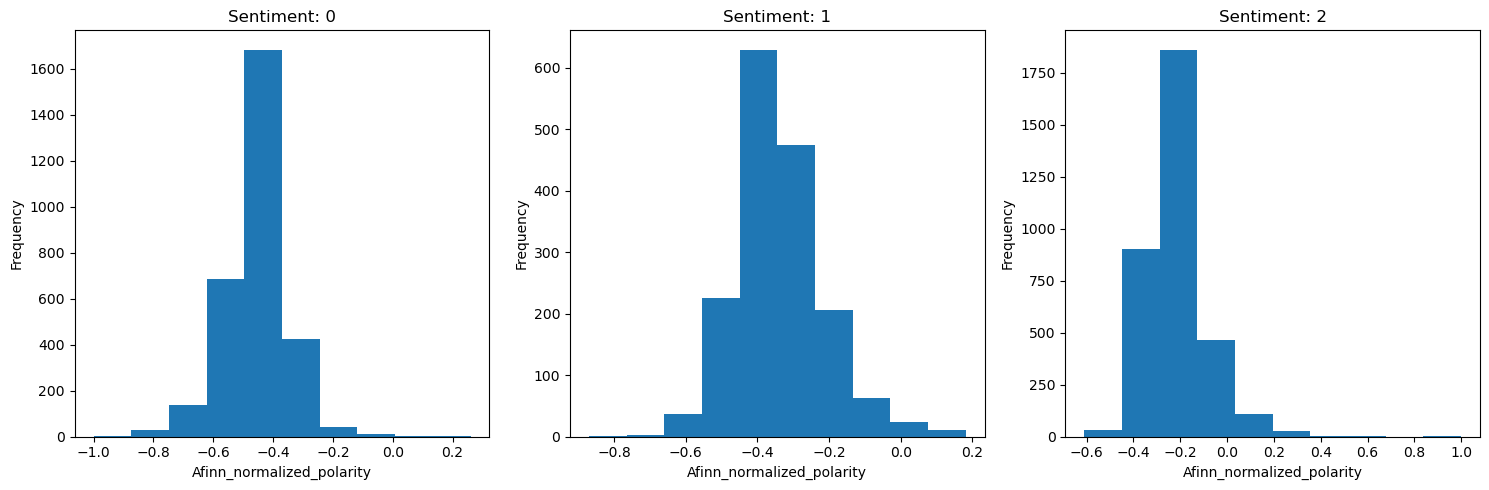

In [24]:
lexicon_based.plot_sentiment_histograms(dataset, sorted_sentiment, 'Afinn_normalized_polarity')

**Polarity boxplots per Sentiment**

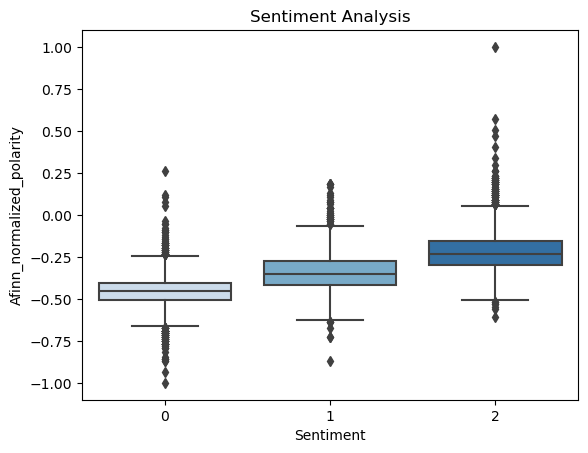

In [25]:
combined_data = pd.concat([dataset[dataset['Sentiment'] == sentiment] for sentiment in sorted_sentiment])

sns.boxplot(data=combined_data, x='Sentiment', y='Afinn_normalized_polarity', palette ='Blues')
plt.title('Sentiment Analysis')
plt.show()

**Total Count histogram**

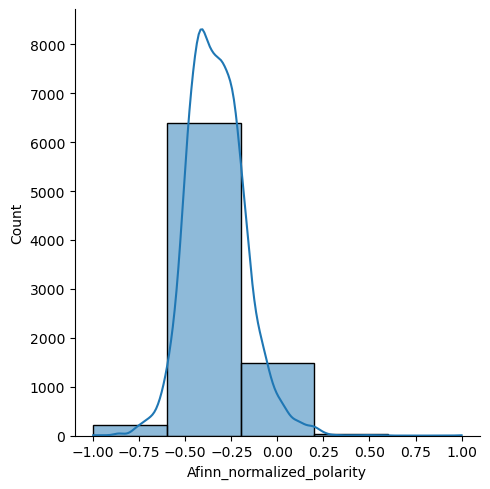

In [26]:
sns.displot(dataset["Afinn_normalized_polarity"], kde=True, bins=5)
plt.show()

### 3. Model Comparison

**Palette**

In [28]:
palette = sns.color_palette("Blues")

Listing the columns to be compared

In [29]:
compare = ['vader_polarity_compound', 'textblob_polarity_compound', 
           'Afinn_normalized_polarity']

**Mean of each algorithm per sentiment**

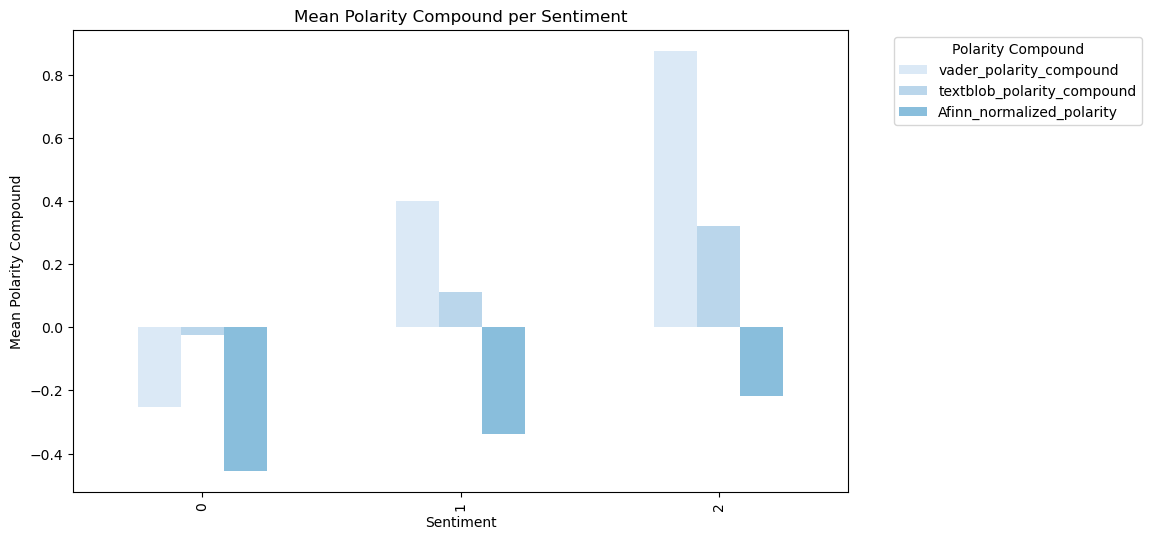

In [30]:
means_by_sentiment = dataset.groupby('Sentiment')[compare].mean()

# Plot the means
ax = means_by_sentiment.plot(kind='bar', figsize=(10, 6), color=palette)
plt.title('Mean Polarity Compound per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Mean Polarity Compound')

# Change the legend location to the upper right
ax.legend(title='Polarity Compound', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**Mean Polarity change accross the years**

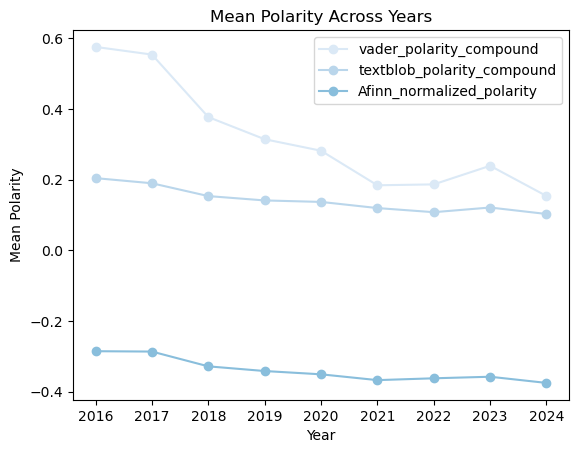

In [31]:
grouped_data = combined_data.groupby('Year')

# Calculate mean polarity for each year
mean_polarity = grouped_data[['vader_polarity_compound', 'textblob_polarity_compound', 'Afinn_normalized_polarity']].mean()

# Plot the data
mean_polarity.plot(kind='line', marker='o', color=palette)
plt.title('Mean Polarity Across Years')
plt.xlabel('Year')
plt.ylabel('Mean Polarity')
plt.xticks(mean_polarity.index)
plt.legend()
plt.show()


**Polarity change across the years in the three sentiments**

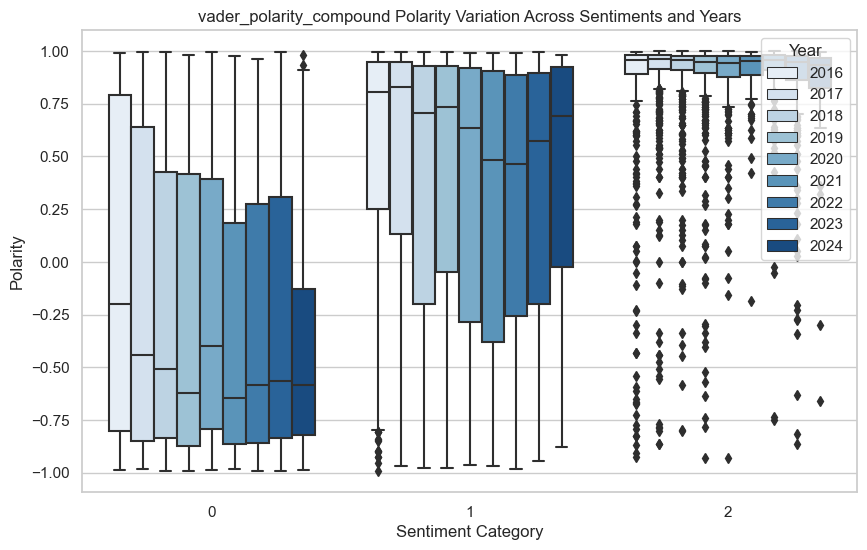

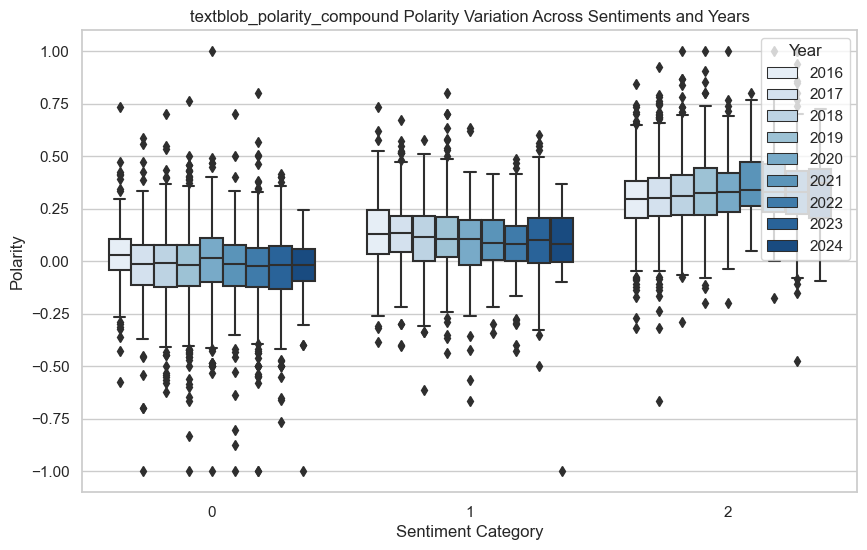

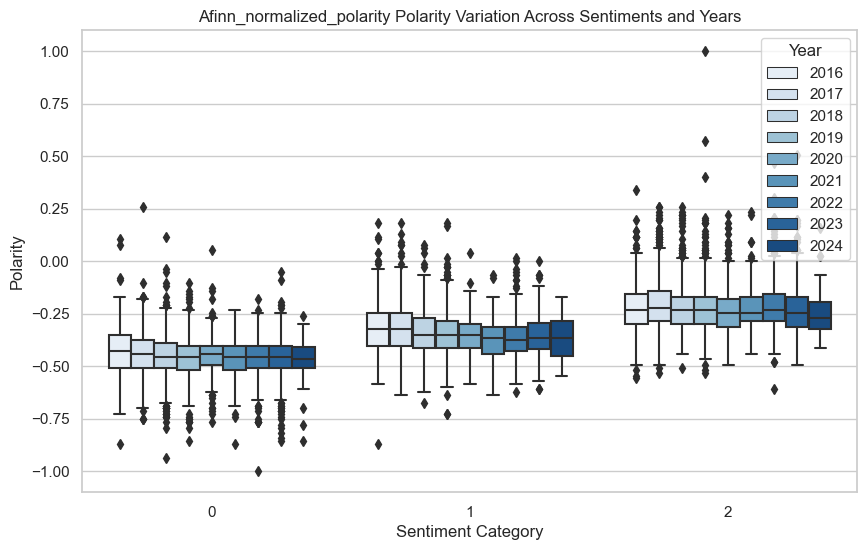

In [32]:
grouped_data = combined_data.groupby(['Year', 'Sentiment'])

# Calculate polarity statistics for each group
polarity_stats = grouped_data[['vader_polarity_compound', 'textblob_polarity_compound', 'Afinn_normalized_polarity']].describe()

# Plot the data for each sentiment analysis method
sns.set(style="whitegrid")

# Iterate over each sentiment analysis method
for method in ['vader_polarity_compound', 'textblob_polarity_compound', 'Afinn_normalized_polarity']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=combined_data, x='Sentiment', y=method, hue='Year', palette='Blues')
    plt.title(f'{method} Polarity Variation Across Sentiments and Years')
    plt.xlabel('Sentiment Category')
    plt.ylabel('Polarity')
    plt.legend(title='Year', loc='upper right')
    plt.show()

**Polarity variation across the years for each Class**

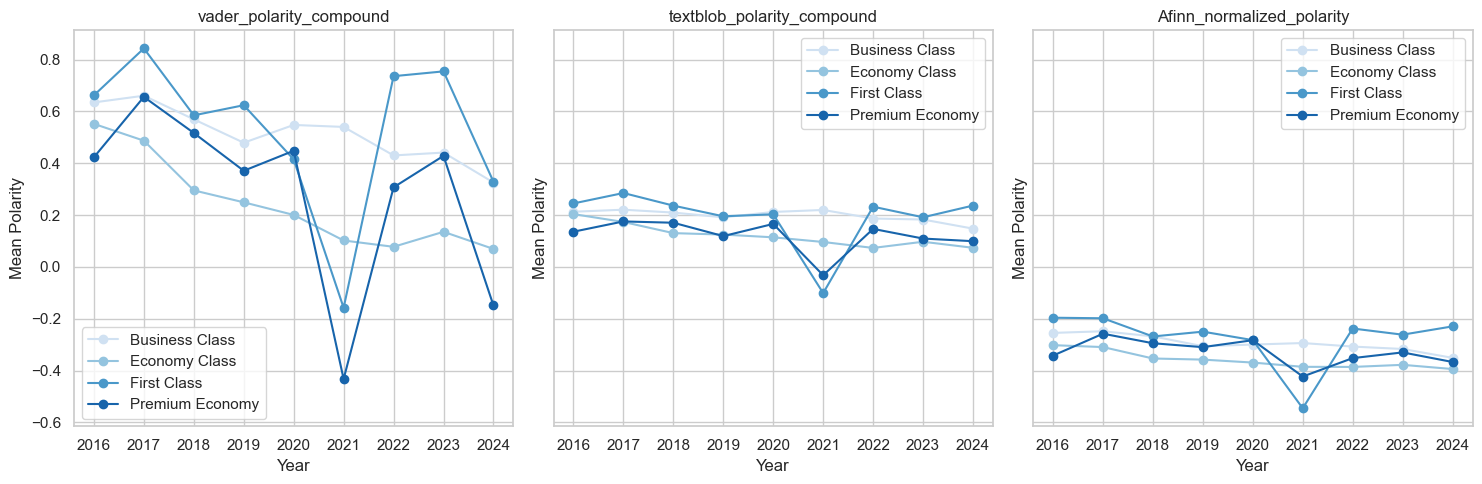

In [38]:
grouped_data = combined_data.groupby(['Class', 'Year'])
mean_polarity_by_class_and_year = grouped_data[['vader_polarity_compound', 'textblob_polarity_compound', 'Afinn_normalized_polarity']].mean().reset_index()

# Define a color palette
palette = sns.color_palette("Blues", len(mean_polarity_by_class_and_year['Class'].unique()))

# Plot the data for each sentiment analysis method
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

for i, method in enumerate(['vader_polarity_compound', 'textblob_polarity_compound', 'Afinn_normalized_polarity']):
    ax = axes[i]
    for j, class_ in enumerate(mean_polarity_by_class_and_year['Class'].unique()):
        class_data = mean_polarity_by_class_and_year[mean_polarity_by_class_and_year['Class'] == class_]
        ax.plot(class_data['Year'], class_data[method], marker='o', label=class_, color=palette[j])
    ax.set_title(method)
    ax.set_xlabel('Year')
    ax.set_ylabel('Mean Polarity')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

**Polarity variation accross the years for each Type of Traveller**

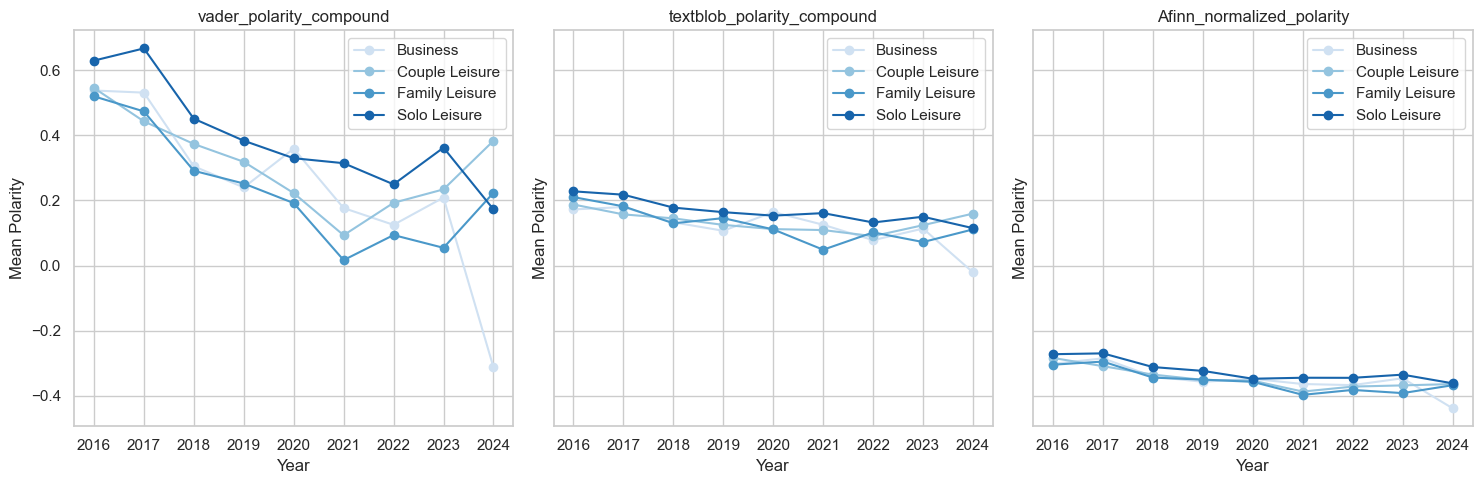

In [40]:
grouped_data = combined_data.groupby(['Type of Traveller', 'Year'])
mean_polarity_by_traveler_and_year = grouped_data[['vader_polarity_compound', 'textblob_polarity_compound', 'Afinn_normalized_polarity']].mean().reset_index()

# Define a color palette
palette = sns.color_palette("Blues", len(mean_polarity_by_traveler_and_year['Type of Traveller'].unique()))

# Plot the data for each sentiment analysis method
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)  # Create subplots for each sentiment analysis method

for i, method in enumerate(['vader_polarity_compound', 'textblob_polarity_compound', 'Afinn_normalized_polarity']):
    ax = axes[i]
    for j, traveler_type in enumerate(mean_polarity_by_traveler_and_year['Type of Traveller'].unique()):
        traveler_data = mean_polarity_by_traveler_and_year[mean_polarity_by_traveler_and_year['Type of Traveller'] == traveler_type]
        ax.plot(traveler_data['Year'], traveler_data[method], marker='o', label=traveler_type, color=palette[j])
    ax.set_title(method)
    ax.set_xlabel('Year')
    ax.set_ylabel('Mean Polarity')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

**Polarity variation across Inflight Experience categories**

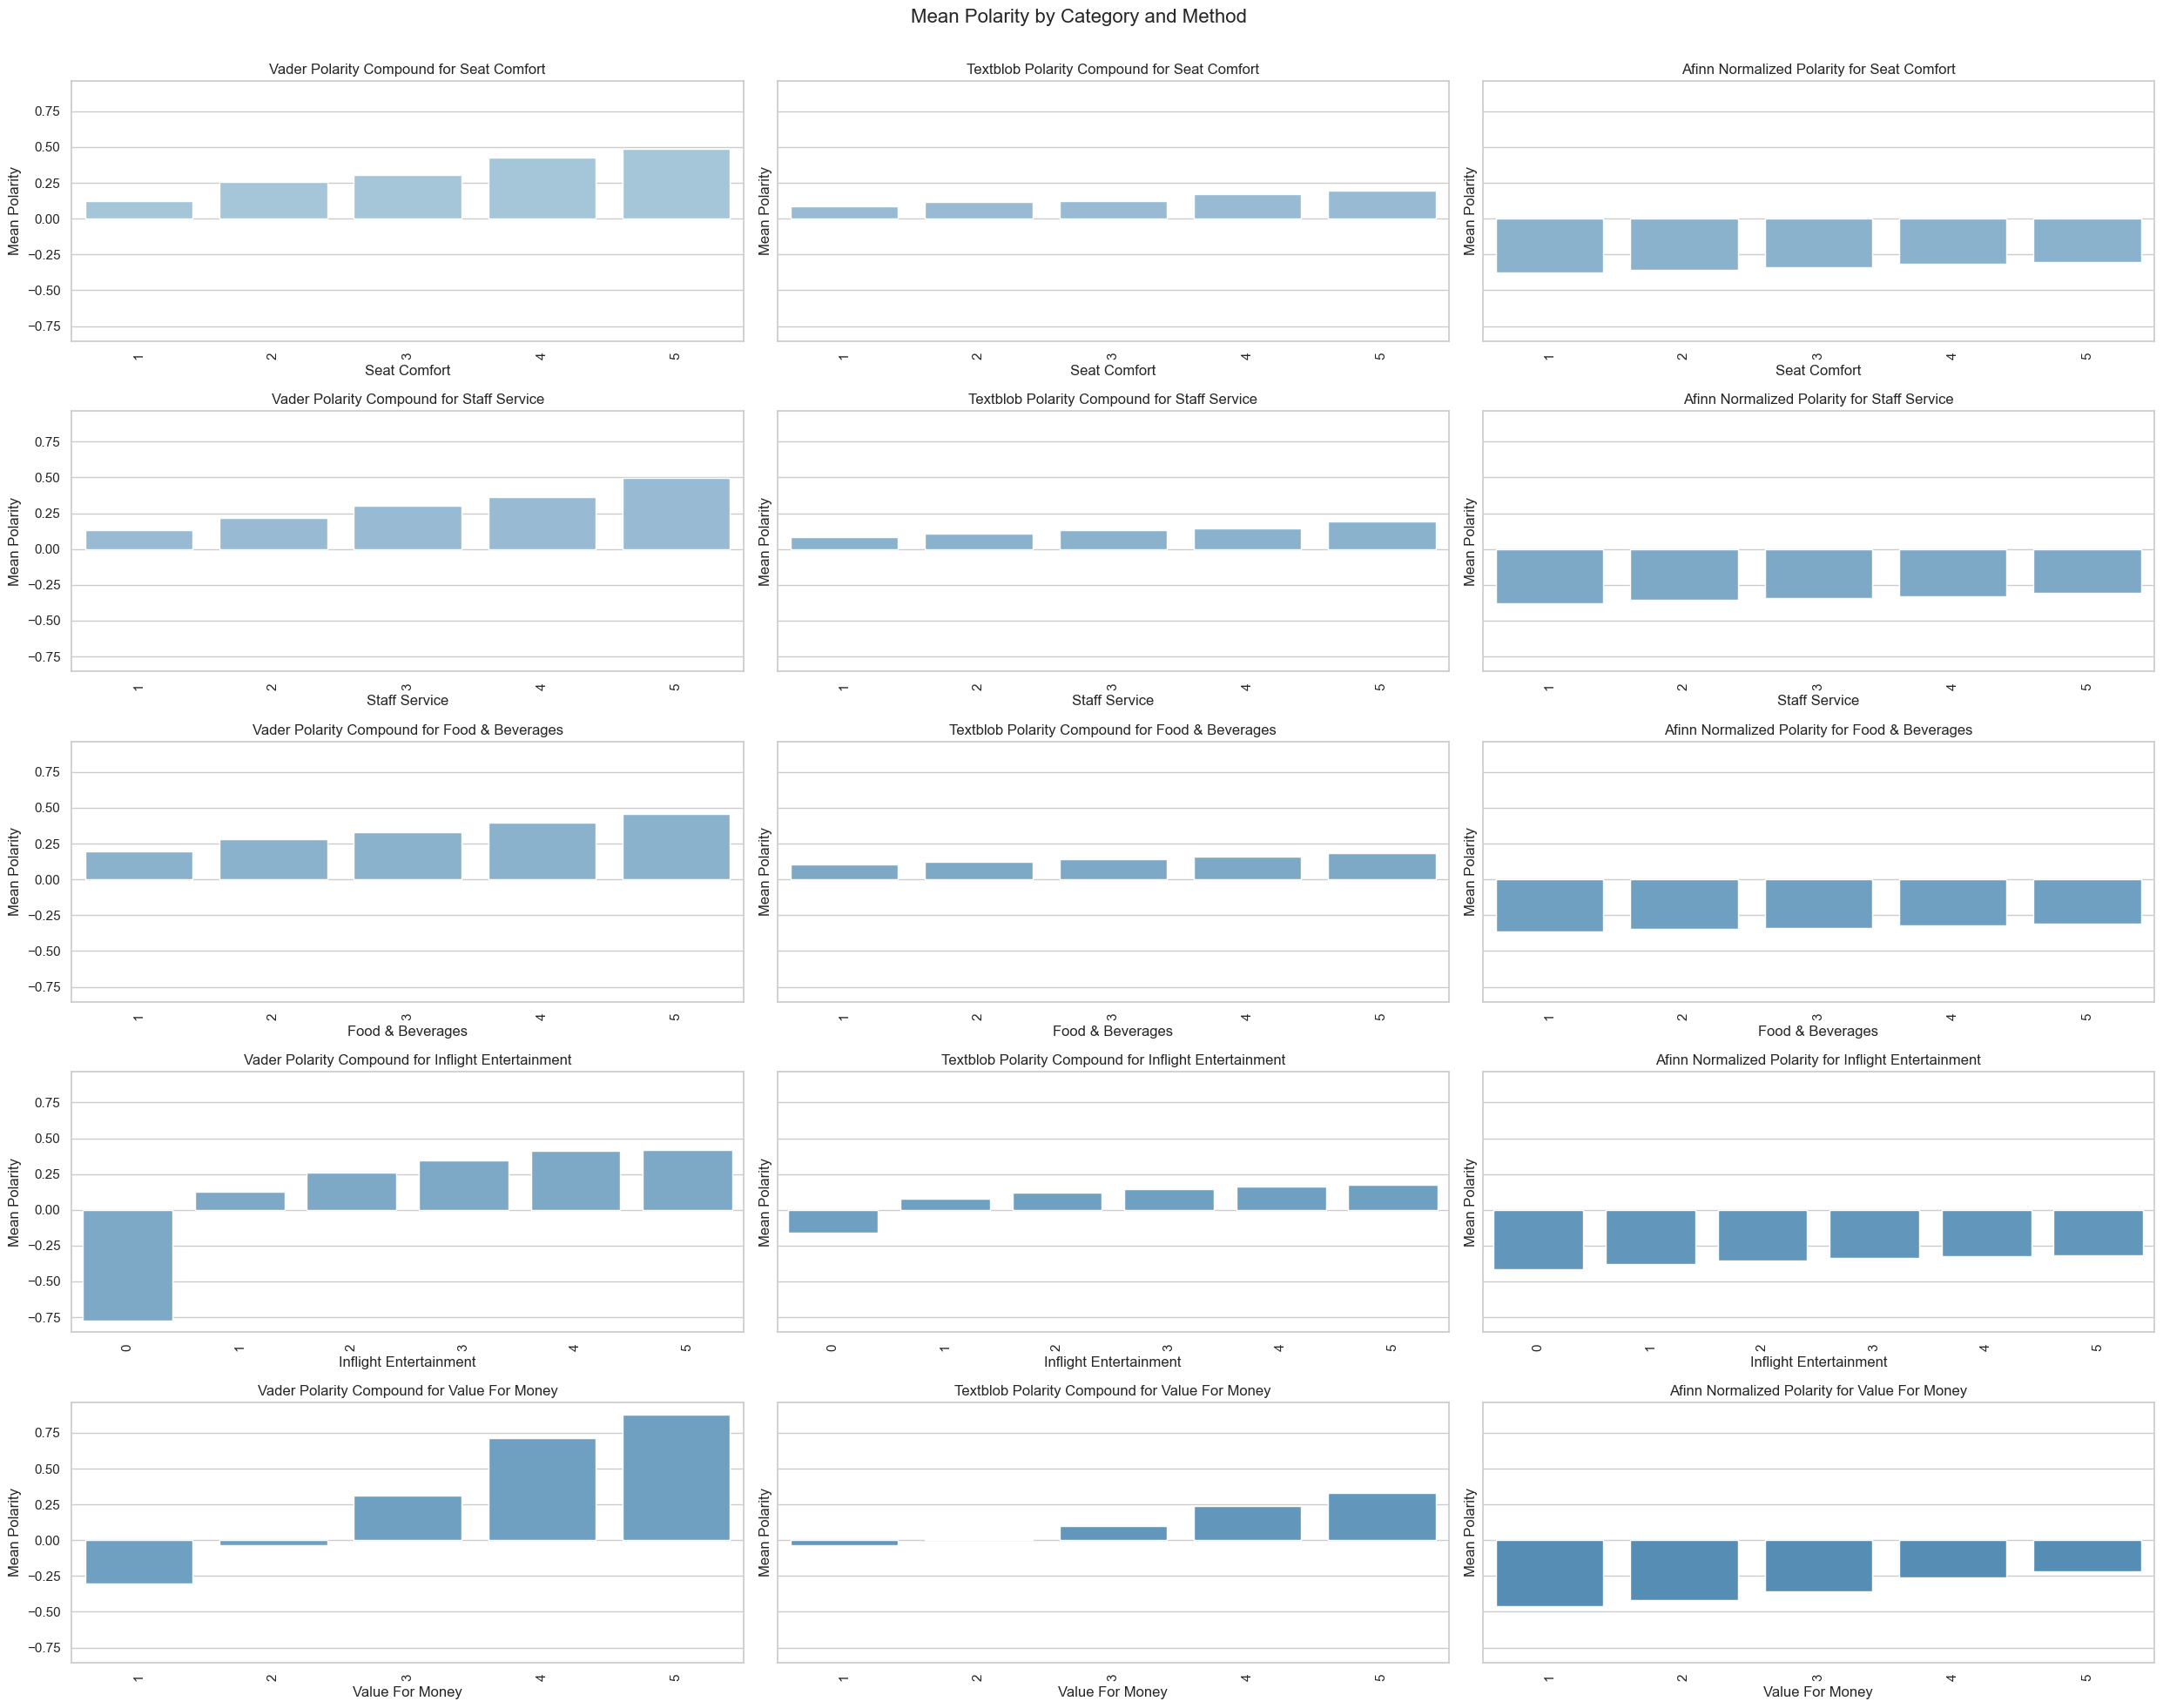

In [43]:
# Define the categories and methods
categories = ['Seat Comfort', 'Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Value For Money']
methods = ['vader_polarity_compound', 'textblob_polarity_compound', 'Afinn_normalized_polarity']

num_categories = len(categories)
num_methods = len(methods)
fig, axes = plt.subplots(num_categories, num_methods, figsize=(25, 20), sharey=True)
fig.suptitle('Mean Polarity by Category and Method \n\n', fontsize=16)

# Define a color palette
palette = sns.color_palette("Blues_d", num_categories * num_methods)

# Plotting
for i, category in enumerate(categories):
    for j, method in enumerate(methods):
        mean_polarity = dataset.groupby(category)[method].mean().reset_index()
        sns.barplot(x=category, y=method, data=mean_polarity, ax=axes[i, j], palette=[palette[i+j]])
        axes[i, j].set_title(f'{method.replace("_", " ").title()} for {category.replace("_", " ").title()}')
        axes[i, j].set_xlabel(category.replace("_", " ").title())
        axes[i, j].set_ylabel('Mean Polarity')
        axes[i, j].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### 4. Further Exploration

**High sentiment with low Polarity**

In [44]:
dataset[(dataset['Sentiment'] == 2) & (dataset['vader_polarity_compound'] < 0)]

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiment,Year,review_length,Reviews_1,vader_polarity_compound,vader_polarity_scores,textblob_polarity_compound,textblob_subjectivity,Afinn_polarity_compound,Afinn_normalized_polarity
64,experience was second to none,Ricky Sharp,2023-09-15,Singapore Airlines,True,I have just flown SQ256 from Brisbane to Sin...,Business,April 2023,Brisbane to Singapore,Business Class,1,5,5,5,5,10,yes,2,2023,134,I flown SQ256 Brisbane Singapore experience se...,-0.2778,"{'neg': 0.197, 'neu': 0.674, 'pos': 0.129, 'co...",0.250000,0.437500,5.0,-0.337662
278,wanted to thank Singapore Airlines,Frances Jojart,2020-08-15,Singapore Airlines,True,We have yet to fly with Singapore Airlines an...,Couple Leisure,August 2020,Sao Paulo to Dublin via Munich,Business Class,5,4,3,4,5,10,yes,2,2020,269,We yet fly Singapore Airlines n't look like fo...,-0.1556,"{'neg': 0.149, 'neu': 0.761, 'pos': 0.091, 'co...",0.266667,0.383333,3.0,-0.363636
401,deterioration in the level of service,C Dalton,2019-10-03,Singapore Airlines,True,Singapore to Perth. Was disappointed with th...,Family Leisure,July 2019,Jakarta to Singapore,Business Class,5,5,1,1,4,8,yes,2,2019,596,Singapore Perth. Was disappointed level servic...,-0.6369,"{'neg': 0.155, 'neu': 0.754, 'pos': 0.091, 'co...",-0.078205,0.419872,-1.0,-0.415584
412,Everything went smoothly,H Marukesh,2019-09-22,Singapore Airlines,True,Melbourne to Mumbai via Singapore. Everythin...,Family Leisure,September 2019,Seoul to Kochi via Singapore,Economy Class,3,3,3,4,4,10,yes,2,2019,656,Melbourne Mumbai via Singapore. Everything che...,-0.2960,"{'neg': 0.033, 'neu': 0.967, 'pos': 0.0, 'comp...",0.063889,0.294444,-3.0,-0.441558
488,Everything was as expected,Grahame Williams,2019-04-30,Singapore Airlines,True,Singapore to Melbourne. Everything was as ex...,Solo Leisure,April 2019,Singapore to Manila,Premium Economy,5,4,5,1,4,8,yes,2,2019,214,Singapore Melbourne. Everything expected terms...,-0.3818,"{'neg': 0.106, 'neu': 0.894, 'pos': 0.0, 'comp...",-0.200000,0.500000,0.0,-0.402597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7625,professional and attentive service,B Crockford,2016-04-05,Cathay Pacific Airways,True,Late departure from SIN on the 8pm flight me...,Solo Leisure,March 2016,SIN to HKG,Business Class,2,3,1,5,4,9,yes,2,2016,327,Late departure SIN 8pm flight meant late arriv...,-0.9251,"{'neg': 0.373, 'neu': 0.572, 'pos': 0.055, 'co...",-0.085714,0.416667,-9.0,-0.519481
7709,pointed to where to get luggage,G Carleno,2019-12-08,EVA Air,True,Tokyo to San Francisco via Taipei. EVA needs...,Solo Leisure,November 2019,Tokyo to San Francisco via Taipei,Premium Economy,4,5,4,3,5,8,yes,2,2019,884,Tokyo San Francisco via Taipei. EVA needs unde...,-0.5709,"{'neg': 0.153, 'neu': 0.699, 'pos': 0.147, 'co...",0.097269,0.444188,1.0,-0.389610
7777,cabin crew was excellent,Doug Dumpa,2018-07-27,EVA Air,True,San Francisco to Manila via Taipei. The chec...,Business,July 2018,San Francisco to Manila via Taipei,Economy Class,4,4,5,4,5,8,yes,2,2018,647,San Francisco Manila via Taipei. The check-in ...,-0.3933,"{'neg': 0.095, 'neu': 0.85, 'pos': 0.055, 'com...",0.226667,0.500000,-1.0,-0.415584
7919,above average legroom,P Gregory,2023-09-25,Korean Air,True,Very satisfied with the overall experience. A...,Couple Leisure,September 2023,Seoul Incheon to London Heathrow,Economy Class,4,4,4,1,4,8,yes,2,2023,525,Very satisfied overall experience. Airfares in...,-0.6314,"{'neg': 0.169, 'neu': 0.68, 'pos': 0.151, 'com...",0.025000,0.541667,5.0,-0.337662


In [45]:
dataset['Reviews'].iloc[64]

'\xa0\xa0I have just flown SQ256 from Brisbane to Singapore and the experience was second to none with outstanding cabin crew. Well done SQ, '

**AFINN Incoherencies**

In [46]:
dataset[(dataset['Afinn_polarity_compound'] > 0) & (dataset['Afinn_normalized_polarity'] <= 0)]

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiment,Year,review_length,Reviews_1,vader_polarity_compound,vader_polarity_scores,textblob_polarity_compound,textblob_subjectivity,Afinn_polarity_compound,Afinn_normalized_polarity
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,2,2024,467,Flight amazing. The crew onboard flight welcom...,0.9633,"{'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'comp...",0.385185,0.577778,20.0,-0.142857
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,2,2024,196,Excellent performance fronts. I would definite...,0.7506,"{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'comp...",0.500000,0.750000,3.0,-0.363636
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,2,2024,991,Pretty comfortable flight considering I flying...,0.9784,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...",0.300219,0.563698,15.0,-0.207792
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,2,2024,310,The service consistently good start finish. Th...,0.9542,"{'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'comp...",0.400000,0.542857,14.0,-0.220779
6,Very ordinary service,S Holger,2024-02-19,Singapore Airlines,True,"Boarding process went smoothly, and plane le...",Solo Leisure,February 2024,Singapore to Frankfurt,Economy Class,1,3,1,2,2,5,no,1,2024,866,"Boarding process went smoothly, plane left tim...",0.6969,"{'neg': 0.013, 'neu': 0.911, 'pos': 0.076, 'co...",0.120833,0.422500,4.0,-0.350649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,I was satisfied with the performance,F Lee,2016-07-09,Korean Air,True,Flown from Seattle to Incheon and then Incheo...,Solo Leisure,July 2016,SEA to SIN via ICN,Economy Class,3,4,5,4,3,7,yes,1,2016,740,Flown Seattle Incheon Incheon Singapore Korean...,0.9451,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...",0.245357,0.419286,4.0,-0.350649
8094,an uneventful flight,N Vickers,2016-06-20,Korean Air,True,"KE124, Brisbane to Incheon (A330) and KE867,...",Business,June 2016,BNE to ULN via ICN,Economy Class,5,4,5,3,4,7,yes,1,2016,751,"KE124, Brisbane Incheon( A330) KE867, Incheon ...",0.2500,"{'neg': 0.025, 'neu': 0.938, 'pos': 0.038, 'co...",0.166667,0.425000,2.0,-0.376623
8095,Korean Air always impresses,Kim Holloway,2016-06-12,Korean Air,False,Our recent flight was our fourth trip to the...,Couple Leisure,June 2016,SYD to LHR via ICN,Economy Class,3,5,5,4,5,10,yes,2,2016,1127,Our recent flight fourth trip UK 6 years Sydne...,0.9921,"{'neg': 0.015, 'neu': 0.664, 'pos': 0.321, 'co...",0.309625,0.497899,24.0,-0.090909
8097,appreciated the service onboard,E Petan,2016-04-21,Korean Air,False,Seoul to Paris with Korean Air. I am traveli...,Business,April 2016,ICN to CDG,Business Class,5,1,3,4,5,10,yes,2,2016,1298,Seoul Paris Korean Air. I traveling triathlon ...,0.9902,"{'neg': 0.018, 'neu': 0.705, 'pos': 0.278, 'co...",0.314441,0.569048,21.0,-0.129870


In [47]:
dataset['Afinn_polarity_compound'].max()

108.0